In [107]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import correlate, convolve
from skimage.measure import block_reduce
from ipywidgets import interactive
from keras.datasets import mnist

In [108]:
def preprocess(im):
    return im/255.

def plots(ims, interp=False, titles=None):
    ims = np.array(ims)
    mn,mx = ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn, vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

### Load MNIST dataset

In [109]:
(images, labels), (test_images, test_labels) = mnist.load_data()
n = len(images)
images.shape

(60000, 28, 28)

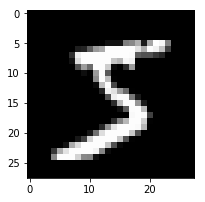

In [110]:
plot(images[0])

In [111]:
labels[0]

5

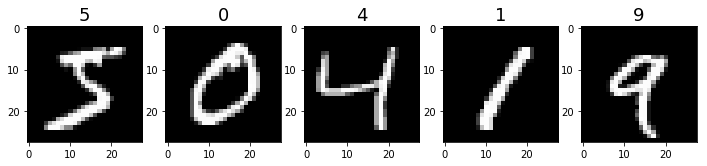

In [112]:
plots(images[:5], titles=labels[:5])

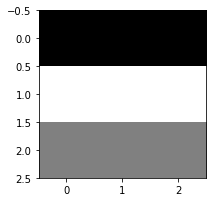

In [113]:
#filter for detecting top edges
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]
plot(top)

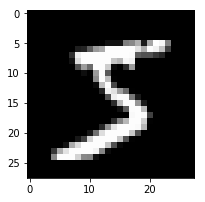

In [114]:
r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w=interactive(zoomim, x1=r, x2=r, y1=r, y2=r)
w

In [115]:
#get arguments from UI above
k=w.kwargs
#build up index tuples for arrays
dims = np.index_exp[k['y1']:k['y2']:1, k['x1']:k['x2']]
images[0][dims]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [116]:
??np.index_exp

In [117]:
im0 = preprocess(images[0])

In [118]:
corrtop = correlate(im0, top)

In [119]:
corrtop[dims]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

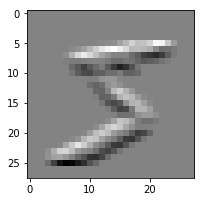

In [120]:
plot(corrtop[dims])

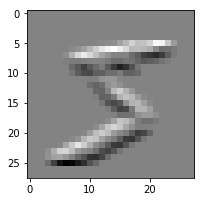

In [121]:
plot(corrtop)

In [122]:
#Rotate an array by 90 degrees (counter-clockwise)
np.rot90(top,1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

Correlate = convolve with the filter rotated by 180 degrees

True

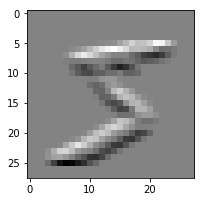

In [123]:
convtop = convolve(im0, np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

### Create filters

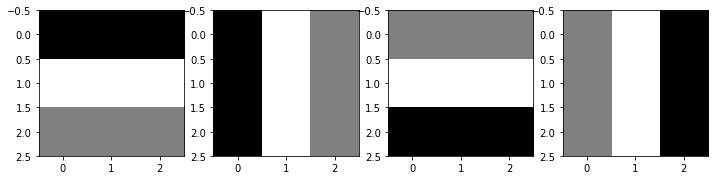

In [124]:
#rotate top-edge filter four times
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

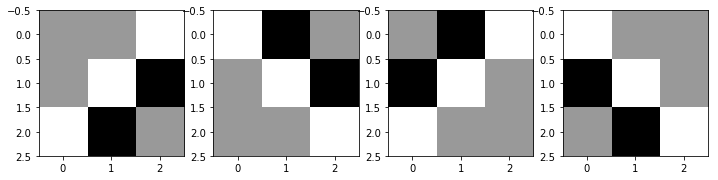

In [125]:
#rotate diagonal filter four times
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

Each filter highlights (gives high values for) the area with the feature it detects:
- e.g. the top-edge filter highlights areas with top edges.
- higher value = whiter

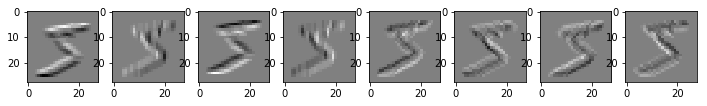

In [126]:
rots = straights + diags
corrs = [correlate(im0, rot) for rot in rots]
plots(corrs)

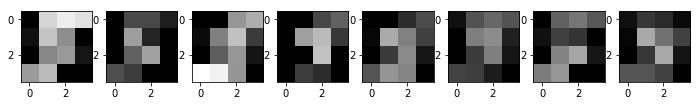

In [127]:
#block_reduce = Down-sample image by applying function to local blocks.
def pool(im):
    return block_reduce(im, (7,7), np.max) #max-pooling (apply max function to local blocks)

plots([pool(im) for im in corrs])

In [128]:
#get images with labels 8 and 1
eights = [preprocess(images[i]) for i in xrange(n) if labels[i]==8]
ones = [preprocess(images[i]) for i in xrange(n) if labels[i]==1]

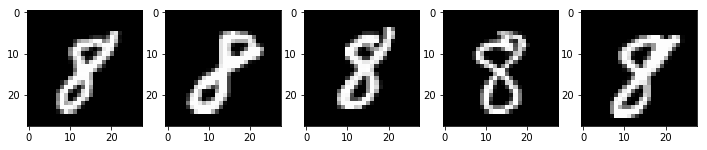

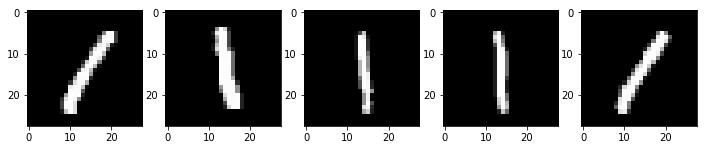

In [129]:
plots(eights[:5])
plots(ones[:5])

In [130]:
#apply correlate then pool on 8's images
pool8 = [np.array([pool(correlate(im, rot)) for im in eights]) for rot in rots]

In [131]:
len(pool8), pool8[0].shape

(8, (5851, 4, 4))

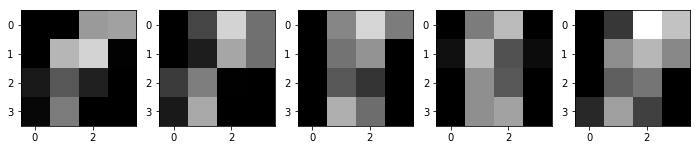

In [132]:
plots(pool8[0][0:5])

In [133]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [134]:
#axis = axis along which the mean is compute
#axis=0: compute mean along the vertical axis (for each column)
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

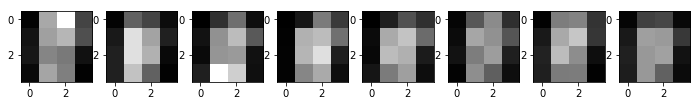

In [135]:
plots(filts8)

In [136]:
#apply correlate then pool on 1's images
pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

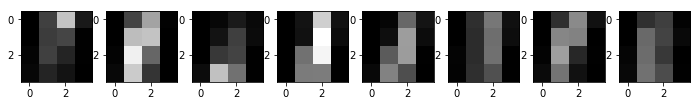

In [140]:
plots(filts1)